In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv('/content/BankChurners.csv')

In [168]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [169]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [170]:
df.drop(columns='CLIENTNUM',inplace=True)

In [171]:
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

In [172]:
df.drop(columns=['Total_Trans_Amt','Total_Trans_Ct'],inplace=True)

In [173]:
df.drop(columns=['Months_on_book','Total_Revolving_Bal','Avg_Open_To_Buy'],inplace=True)

In [175]:
df['Education_Level'].replace({'Unknown':np.nan,'Post-Graduate':'Advanced_Degree','Doctorate':'Advanced_Degree'},inplace=True)
df['Marital_Status'].replace({'Unknown':np.nan},inplace=True)
df['Income_Category'].replace({'Unknown':np.nan},inplace=True)

In [177]:
!pip install mlflow

In [178]:
import mlflow

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [180]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [182]:
!pip install mlflow dagshub

In [183]:
import dagshub
dagshub.init(repo_owner='Ranjan113', repo_name='credit-card-churn', mlflow=True)

Initialized MLflow to track repo "Ranjan113/credit-card-churn"

Repository Ranjan113/credit-card-churn initialized!

In [184]:
mlflow.set_tracking_uri("https://dagshub.com/Ranjan113/credit-card-churn.mlflow")

In [185]:
mlflow.set_experiment("Exp 1 - Trying different Imputing techniques")

<Experiment: artifact_location='mlflow-artifacts:/75c98b70e9b0414eb75aa4f79450d053', creation_time=1756882791819, experiment_id='0', last_update_time=1756882791819, lifecycle_stage='active', name='Exp 1 - Trying different Imputing techniques', tags={}>

In [99]:
print("Tracking URI:", mlflow.get_tracking_uri())

Tracking URI: https://dagshub.com/Ranjan113/credit-card-churn.mlflow


In [100]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [66]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Transaction_Value
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,1.335,1.625,0.061,27.238095


In [ ]:
# gender_pipe = Pipeline(steps=[
#     ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
# ])

# education_pipe = Pipeline(steps=[
#     ('impute',SimpleImputer(strategy='most_frequent',add_indicator=True)),
#     ('encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]))
# ])

# marital_income_pipe = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent',add_indicator=True)),
#     ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))
# ])

In [ ]:
# preprocessor = ColumnTransformer(transformers=[
#     ('gender',gender_pipe,['Gender']),
#     ('education',education_pipe,['Education_Level']),
#     ('marital_income',marital_income_pipe,['Marital_Status','Income_Category']),
#     ('encoding_card',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Card_Category']),
#     ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])


# ],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False)

# preprocessor.set_output(transform="pandas")

In [113]:
simple_imputer = ColumnTransformer(transformers=[
    ('mode_imputing',SimpleImputer(strategy='most_frequent',add_indicator=True),['Education_Level','Marital_Status','Income_Category'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

encode = ColumnTransformer(transformers=[
    ('ordinal_encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]),['Education_Level']),
    ('nominal_encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Gender','Marital_Status','Income_Category','Card_Category'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

power_transform = ColumnTransformer(transformers=[
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


In [114]:
preprocessor_pipeline = Pipeline(steps=[
    ("simple_imputer",simple_imputer),
    ('encoding',encode),
    ('pt',power_transform)
])

preprocessor_pipeline.set_output(transform="pandas")

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputing',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  ['Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category'])],
                                   verbose_feature_names_out=False)),
                ('encoding',
                 ColumnTransformer(force_int_remainder_co...
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('power_transform',
                                                  PowerTransformer(),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio',
                                                   'Avg_Transaction_Value'])],
                                   verbose_feature_names_out=False))])

In [109]:
# preprocessor_pipeline.get_params()

In [115]:
X_train_trans = preprocessor_pipeline.fit_transform(X_train)
X_test_trans = preprocessor_pipeline.transform(X_test)

X_train_trans

le = LabelEncoder()

y_train_le = le.fit_transform(y_train.values.ravel())
y_test_le = le.transform(y_test.values.ravel())

In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trans,y_train_le)

LogisticRegression()

In [117]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

y_train_proba = lr.predict_proba(X_train_trans)[:,1]
y_test_proba = lr.predict_proba(X_test_trans)[:,1]

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

=== Train Performance ===
Accuracy: 0.8824836439945686
Precision: 0.8961126913178925
Recall: 0.9727981179238347
F1 Score: 0.9328821206993796
ROC-AUC: 0.8514397204031081

=== Test Performance ===
Accuracy: 0.8795656465942744
Precision: 0.8900804289544236
Recall: 0.9770453207769276
F1 Score: 0.9315375982042648
ROC-AUC: 0.8331596387873421




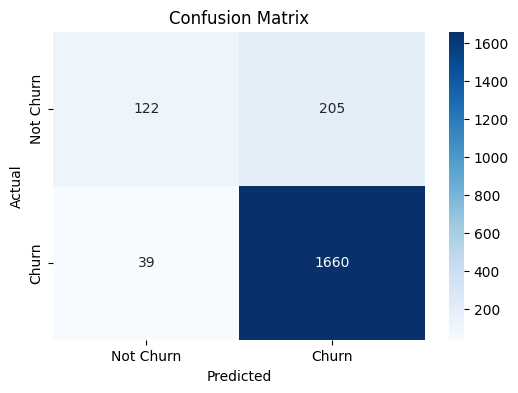

In [119]:
print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train_le, y_pred_train))
print("Precision:", precision_score(y_train_le, y_pred_train))
print("Recall:", recall_score(y_train_le, y_pred_train))
print("F1 Score:", f1_score(y_train_le, y_pred_train))
print("ROC-AUC:", roc_auc_score(y_train_le, y_train_proba))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test_le, y_pred_test))
print("Precision:", precision_score(y_test_le, y_pred_test))
print("Recall:", recall_score(y_test_le, y_pred_test))
print("F1 Score:", f1_score(y_test_le, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test_le, y_test_proba))

print()
print()

cm = confusion_matrix(y_test_le, y_pred_test)

labels = ['Not Churn', 'Churn']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [120]:
# log experiment

with mlflow.start_run(run_name="Mode_Impute+Missing_Indicator"):

    mlflow.log_param("experiment_type","Mode_Impute+Missing_Indicator")


    mlflow.log_params(lr.get_params())

    mlflow.log_metric("train_accuracy", accuracy_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_precision", precision_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_recall", recall_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_f1", f1_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_roc_auc", roc_auc_score(y_train_le, y_train_proba))

    mlflow.log_metric("test_accuracy", accuracy_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_precision", precision_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_recall", recall_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_f1", f1_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_roc_auc", roc_auc_score(y_test_le, y_test_proba))

🏃 View run Mode_Impute+Missing_Indicator at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/0/runs/93c37dfe9c27473eae4f5b171a4058c7
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/0


In [134]:
temp_df = df.copy().dropna()

In [157]:
df.shape

(10127, 16)

In [151]:
temp_df.shape

(7081, 16)

In [135]:
X = temp_df.iloc[:,1:]
y = temp_df.iloc[:,:1]

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [143]:
encode = ColumnTransformer(transformers=[
    ('ordinal_encoding',OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Advanced_Degree']]),['Education_Level']),
    ('nominal_encoding',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),['Gender','Marital_Status','Income_Category','Card_Category'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

power_transform = ColumnTransformer(transformers=[
    ('power_transform',PowerTransformer(),['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Avg_Transaction_Value'])
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

In [144]:
preprocessor_pipeline = Pipeline(steps=[
    ('encoding',encode),
    ('pt',power_transform)
])

preprocessor_pipeline.set_output(transform="pandas")

Pipeline(steps=[('encoding',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['Uneducated',
                                                                              'High '
                                                                              'School',
                                                                              'College',
                                                                              'Graduate',
                                                                              'Advanced_Degree']]),
                                                  ['Education_Level']),
                                                 ('nominal_encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=F...
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('power_transform',
                                                  PowerTransformer(),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio',
                                                   'Avg_Transaction_Value'])],
                                   verbose_feature_names_out=False))])

In [145]:
X_train_trans = preprocessor_pipeline.fit_transform(X_train)
X_test_trans = preprocessor_pipeline.transform(X_test)

X_train_trans

le = LabelEncoder()

y_train_le = le.fit_transform(y_train.values.ravel())
y_test_le = le.transform(y_test.values.ravel())

In [146]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_trans,y_train_le)

LogisticRegression()

In [147]:
y_pred_train = lr.predict(X_train_trans)
y_pred_test = lr.predict(X_test_trans)

y_train_proba = lr.predict_proba(X_train_trans)[:,1]
y_test_proba = lr.predict_proba(X_test_trans)[:,1]

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

=== Train Performance ===
Accuracy: 0.8801200564971752
Precision: 0.8917881811204912
Recall: 0.9758555532227587
F1 Score: 0.9319298245614035
ROC-AUC: 0.8408475151713996

=== Test Performance ===
Accuracy: 0.8877911079745943
Precision: 0.8986280487804879
Recall: 0.9784232365145228
F1 Score: 0.9368295589988082
ROC-AUC: 0.8669693885539811




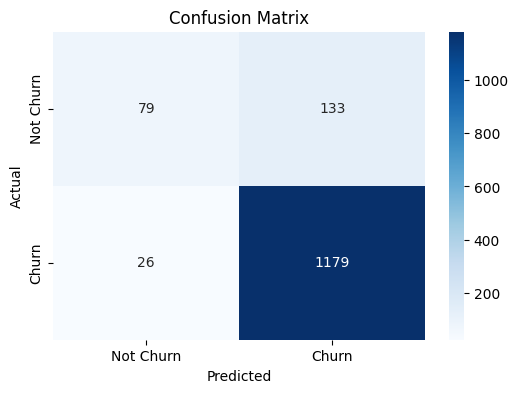

In [149]:
print("=== Train Performance ===")
print("Accuracy:", accuracy_score(y_train_le, y_pred_train))
print("Precision:", precision_score(y_train_le, y_pred_train))
print("Recall:", recall_score(y_train_le, y_pred_train))
print("F1 Score:", f1_score(y_train_le, y_pred_train))
print("ROC-AUC:", roc_auc_score(y_train_le, y_train_proba))

print("\n=== Test Performance ===")
print("Accuracy:", accuracy_score(y_test_le, y_pred_test))
print("Precision:", precision_score(y_test_le, y_pred_test))
print("Recall:", recall_score(y_test_le, y_pred_test))
print("F1 Score:", f1_score(y_test_le, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test_le, y_test_proba))

print()
print()

cm = confusion_matrix(y_test_le, y_pred_test)

labels = ['Not Churn', 'Churn']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [150]:
# log experiment

with mlflow.start_run(run_name="Drop Missing Values"):

    mlflow.log_param("experiment_type","Drop Missing Values")


    mlflow.log_params(lr.get_params())

    mlflow.log_metric("train_accuracy", accuracy_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_precision", precision_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_recall", recall_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_f1", f1_score(y_train_le, y_pred_train))
    mlflow.log_metric("train_roc_auc", roc_auc_score(y_train_le, y_train_proba))

    mlflow.log_metric("test_accuracy", accuracy_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_precision", precision_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_recall", recall_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_f1", f1_score(y_test_le, y_pred_test))
    mlflow.log_metric("test_roc_auc", roc_auc_score(y_test_le, y_test_proba))

🏃 View run Drop Missing Values at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/0/runs/fb927af7b5e443d4914bd18149839024
🧪 View experiment at: https://dagshub.com/Ranjan113/credit-card-churn.mlflow/#/experiments/0


"Dropping rows with missing values gives the best performance metrics, but results in a **loss of ~30% of the data** (from 10k to ~7k rows). Therefore, we use **mode imputation**, which preserves all data and achieves **comparable results**."